In [45]:
import tensorflow_datasets as tfds

data,info = tfds.load('ag_news_subset', with_info=True, as_supervised=True)

In [46]:
class_names = info.features['label'].names
class_names

['World', 'Sports', 'Business', 'Sci/Tech']

In [47]:
training_sentences = []
testing_sentence = []

training_labels = []
testing_labels = []

for text, label in data['train']:
    training_sentences.append(str(text.numpy().decode()))
    training_labels.append(label.numpy())
    
for text, label in data['train']:
    testing_sentence.append(str(text.numpy().decode()))
    testing_labels.append(label.numpy())

In [48]:
training_sentences

['AMD #39;s new dual-core Opteron chip is designed mainly for corporate computing applications, including databases, Web services, and financial transactions.',
 'Reuters - Major League Baseball\\Monday announced a decision on the appeal filed by Chicago Cubs\\pitcher Kerry Wood regarding a suspension stemming from an\\incident earlier this season.',
 'President Bush #39;s  quot;revenue-neutral quot; tax reform needs losers to balance its winners, and people claiming the federal deduction for state and local taxes may be in administration planners #39; sights, news reports say.',
 'Britain will run out of leading scientists unless science education is improved, says Professor Colin Pillinger.',
 'London, England (Sports Network) - England midfielder Steven Gerrard injured his groin late in Thursday #39;s training session, but is hopeful he will be ready for Saturday #39;s World Cup qualifier against Austria.',
 'TOKYO - Sony Corp. is banking on the \\$3 billion deal to acquire Hollywoo

In [49]:
import mngdataclean as mng

cleaned_training_sentences = [mng.get_clean(x) for x in training_sentences]
cleaned_testing_sentences = [mng.get_clean(x) for x in testing_sentence]

In [50]:
cleaned_training_sentences

['amd  s new dualcore opteron chip is designed mainly for corporate computing applications including databases web services and financial transactions',
 'reuters  major league baseballmonday announced a decision on the appeal filed by chicago cubspitcher kerry wood regarding a suspension stemming from anincident earlier this season',
 'president bush  s  quotrevenueneutral quot tax reform needs losers to balance its winners and people claiming the federal deduction for state and local taxes may be in administration planners sights news reports say',
 'britain will run out of leading scientists unless science education is improved says professor colin pillinger',
 'london england sports network  england midfielder steven gerrard injured his groin late in thursday  s training session but is hopeful he will be ready for saturday  s world cup qualifier against austria',
 'tokyo  sony corp is banking on the 3 billion deal to acquire hollywood studio metrogoldwynmayer inc',
 'giant pandas m

## tokenization

In [51]:
from keras.preprocessing.text import Tokenizer

tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_training_sentences)

word_index = tokenizer.word_index
print(len(word_index))

90046


In [52]:
import pickle

pickle.dump(tokenizer, open('tokenizer.pkl', 'wb'))

In [53]:
training_sequences = tokenizer.fit_on_sequences(cleaned_training_sentences)

testing_sequences = tokenizer.fit_on_sequences(cleaned_testing_sentences)

In [54]:
from keras.preprocessing.sequence import pad_sequences
max_len = max([len(x) for x in training_sequences])

training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre')
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre')

TypeError: 'NoneType' object is not iterable

In [56]:
import mngdataclean as mng
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences

# Assuming training_sentences and testing_sentences are defined elsewhere
cleaned_training_sentences = [mng.get_clean(x) for x in training_sentences]
cleaned_testing_sentences = [mng.get_clean(x) for x in testing_sentence]

tokenizer = Tokenizer()
tokenizer.fit_on_texts(cleaned_training_sentences)

training_sequences = tokenizer.texts_to_sequences(cleaned_training_sentences)
testing_sequences = tokenizer.texts_to_sequences(cleaned_testing_sentences)

max_len = max([len(x) for x in training_sequences])

training_padded = pad_sequences(training_sequences, maxlen=max_len, padding='pre')
testing_padded = pad_sequences(testing_sequences, maxlen=max_len, padding='pre')


In [67]:
training_padded.shape

(120000, 177)

In [58]:
print(training_padded[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0 1606   11   20 4191 5798  677    8  742 4681    9  673
 1693  948  245 7798  227  219    6  314 6008]


In [61]:
from numpy import sqrt

vocab_size = len(tokenizer.word_index)+1
embedding_dim = int((1/4)*sqrt(vocab_size))
embedding_dim

75

In [62]:
num_classes = len(class_names)
#embedding dim is usally 1/4*(sqrt(vocab_size))
embedding_dim = embedding_dim

In [63]:
from keras.utils import to_categorical
y_train = training_labels
y_train_coded = to_categorical(y_train, num_classes)

In [69]:
from keras.models import Sequential
from keras.layers import LSTM, Embedding,Dense

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(LSTM(embedding_dim, return_sequences=True, dropout=0.2))
model.add(LSTM(embedding_dim, dropout=0.2))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 177, 75)           6753525   
                                                                 
 lstm_1 (LSTM)               (None, 177, 75)           45300     
                                                                 
 lstm_2 (LSTM)               (None, 75)                45300     
                                                                 
 dense_1 (Dense)             (None, 4)                 304       
                                                                 
Total params: 6844429 (26.11 MB)
Trainable params: 6844429 (26.11 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [72]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(training_padded, y_train_coded, epochs=3,batch_size=128, validation_split=0.2)


Epoch 1/3
750/750 [==============================] - 219s 288ms/step - loss: 0.3460 - accuracy: 0.8815 - val_loss: 0.3045 - val_accuracy: 0.8971
Epoch 2/3
750/750 [==============================] - 232s 309ms/step - loss: 0.2609 - accuracy: 0.9130 - val_loss: 0.2829 - val_accuracy: 0.9041
Epoch 3/3
750/750 [==============================] - 219s 292ms/step - loss: 0.2225 - accuracy: 0.9258 - val_loss: 0.2796 - val_accuracy: 0.9067


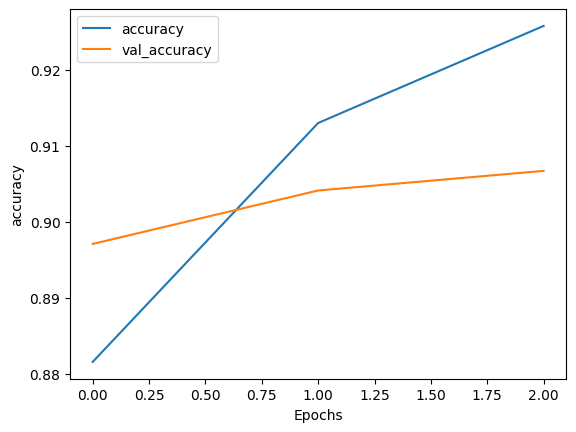

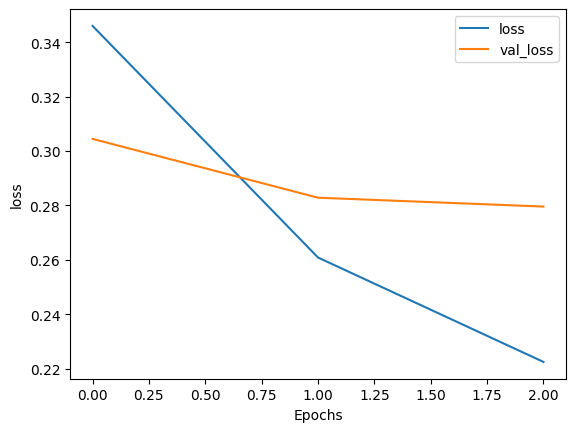

In [73]:
import matplotlib.pyplot as plt

def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

#### bidirectional LSTM

In [74]:
from keras.models import Sequential
from keras.layers import Bidirectional, Embedding,Dense, LSTM

model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_len))
model.add(Bidirectional(LSTM(embedding_dim, return_sequences=True, dropout=0.2)))
model.add(Bidirectional(LSTM(embedding_dim, dropout=0.2)))

model.add(Dense(num_classes, activation='softmax'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 177, 75)           6753525   
                                                                 
 bidirectional (Bidirection  (None, 177, 150)          90600     
 al)                                                             
                                                                 
 bidirectional_1 (Bidirecti  (None, 150)               135600    
 onal)                                                           
                                                                 
 dense_2 (Dense)             (None, 4)                 604       
                                                                 
Total params: 6980329 (26.63 MB)
Trainable params: 6980329 (26.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [75]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
history = model.fit(training_padded, y_train_coded, epochs=3,batch_size=128, validation_split=0.2)

Epoch 1/3
750/750 [==============================] - 819s 1s/step - loss: 0.5326 - accuracy: 0.7864 - val_loss: 0.3325 - val_accuracy: 0.8908
Epoch 2/3
750/750 [==============================] - 1010s 1s/step - loss: 0.2883 - accuracy: 0.9044 - val_loss: 0.2913 - val_accuracy: 0.9023
Epoch 3/3
750/750 [==============================] - 970s 1s/step - loss: 0.2346 - accuracy: 0.9219 - val_loss: 0.2900 - val_accuracy: 0.9054


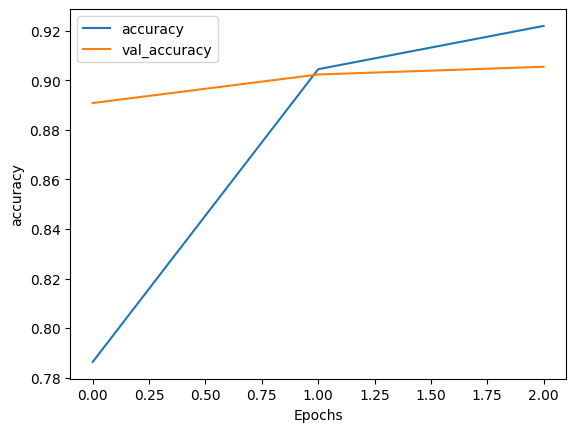

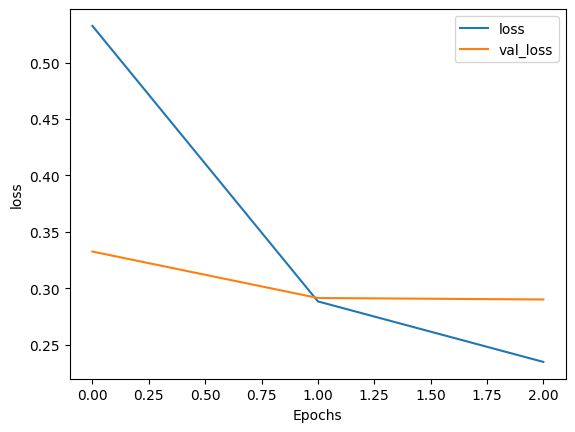

In [76]:
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [78]:
model.save('news_classification.h5')

In [79]:
pickle.dump(max_len, open('max_len.pkl', 'wb'))

In [80]:
pickle.dump(class_names, open('class_names.pkl', 'wb'))